In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import OrdinalEncoder
ol=OrdinalEncoder()
df["Gender"]=ol.fit_transform(df[["Gender"]])

In [5]:
df["Gender"].value_counts()

,count
Gender,
0.0,112
1.0,88


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40


### **Applying Kmeans Clustering**

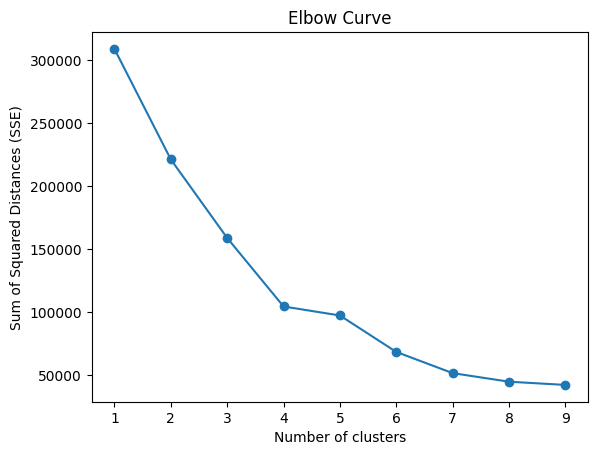

In [7]:
#First_step
#Finding number of clusters using elbow method

#prepare the data for clustering
X= df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

#Using Elbow Method
sse = []
k_range = range(1,10) #The range from 1 to 10
for k in k_range:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(X)
    sse.append(k_means.inertia_)

#plotting the Elbow curve

plt.plot(k_range, sse, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()

In [8]:
#Assiging cluster

features = X
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(features)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1.0,19,15,39,2
1,2,1.0,21,15,81,2
2,3,0.0,20,16,6,0
3,4,0.0,23,16,77,2
4,5,0.0,31,17,40,0
...,...,...,...,...,...,...
195,196,0.0,35,120,79,1
196,197,0.0,45,126,28,3
197,198,1.0,32,126,74,1
198,199,1.0,32,137,18,3


In [9]:
# Get centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

print("Cluster centroids:")
print(centroids)

# Optional: See average values per cluster
print("\nCluster profiles:")
print(df.groupby('Cluster').mean(numeric_only=True))

Cluster centroids:
     Gender        Age  Annual Income (k$)  Spending Score (1-100)
0  0.382022  46.213483           47.719101               41.797753
1  0.454545  32.454545          108.181818               82.727273
2  0.482759  24.689655           29.586207               73.655172
3  0.526316  40.394737           87.000000               18.631579
4  0.454545  31.787879           76.090909               77.757576

Cluster profiles:
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         69.247191  0.382022  46.213483           47.719101   
1        190.000000  0.454545  32.454545          108.181818   
2         30.586207  0.482759  24.689655           29.586207   
3        162.000000  0.526316  40.394737           87.000000   
4        145.575758  0.454545  31.787879           76.090909   

         Spending Score (1-100)  
Cluster                          
0                     41.797753  
1        

In [10]:
#Renaming Clusters

cluster_names = {0: 'Practical Middle-Aged Shoppers” (average spend, average income',
                 1:'High-Income Big Spenders” (premium customers 💰)',
                 2:'Young Low-Income High Spenders” (students/young impulsive buyers)',
                 3: 'Wealthy Low Spenders” (hard to convert, maybe need premium offers)',
                 4: 'Young Affluent Spenders” (good long-term customers)'

                 }

df["Customer_group"] = df["Cluster"].map(cluster_names)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_group
0,1,1.0,19,15,39,2,Young Low-Income High Spenders” (students/youn...
1,2,1.0,21,15,81,2,Young Low-Income High Spenders” (students/youn...
2,3,0.0,20,16,6,0,Practical Middle-Aged Shoppers” (average spend...
3,4,0.0,23,16,77,2,Young Low-Income High Spenders” (students/youn...
4,5,0.0,31,17,40,0,Practical Middle-Aged Shoppers” (average spend...


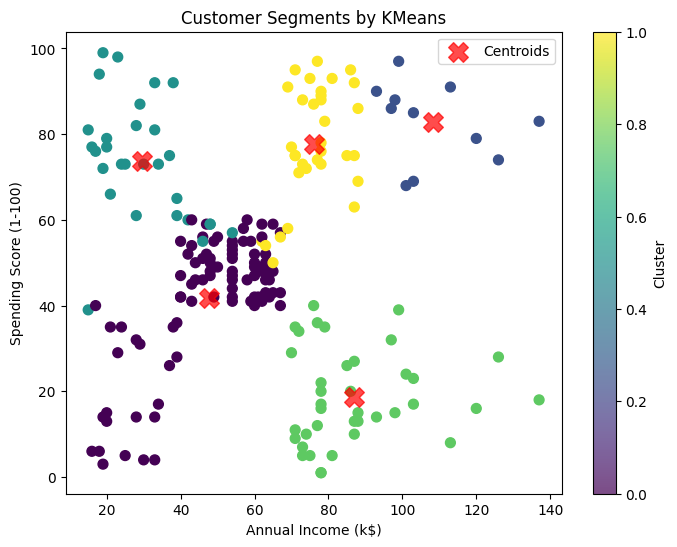

In [11]:
# Choosing two features to visualize (commonly Income vs Spending)
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(x, y, c=df['Cluster'], cmap='viridis', s=50)  # color by cluster

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,2], centers[:,3], c='red', s=200, alpha=0.7, marker='X', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments by KMeans')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [12]:
#Now using silhouette score to find out how similar a point to its own cluster rather then other cluster
#Evaluating the cluster performence

print(silhouette_score(features, df["Cluster"]))

0.3574050351346702


In [13]:
#Trying to check whether the Gender affects the Results of the Dataset

# With Gender
X_with_gender = df[['Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
kmeans_with = KMeans(n_clusters=5, random_state=42).fit(X_with_gender)
score_with = silhouette_score(X_with_gender, kmeans_with.labels_)
print("With Gender:", score_with)

# Without Gender
X_without_gender = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
kmeans_without = KMeans(n_clusters=5, random_state=42).fit(X_without_gender)
score_without = silhouette_score(X_without_gender, kmeans_without.labels_)
print("Without Gender:", score_without)


With Gender: 0.3574050351346702
Without Gender: 0.3575963460506624


In [14]:
#Saving The File

import pickle
pickle.dump(kmeans, open('Mall_customer.pkl','wb'))
kmeans = pickle.load(open('Mall_customer.pkl','rb'))

In [15]:
#predict the cluster for new customer

def clustering(Gender, Age, Annual_Income_k, Spending_Score_1_100):
  new_customer = [[Gender, Age, Annual_Income_k, Spending_Score_1_100]]
  predicted_cluster = kmeans.predict(new_customer)

  if predicted_cluster[0] == 0:
    print("Practical Middle-Aged Shoppers” (average spend, average income")
  elif predicted_cluster[0] == 1:
    print("High-Income Big Spenders” (premium customers 💰)")
  elif predicted_cluster[0] == 2:
    print("Young Low-Income High Spenders” (students/young impulsive buyers)")
  else:
    print("Wealthy Low Spenders” (hard to convert, maybe need premium offers)")

In [16]:
#new customer
Gender = 0
Age = 23
Annual_Income_k = 90
Spending_Score_1_100 = 100

clustering(Gender, Age, Annual_Income_k, Spending_Score_1_100)

High-Income Big Spenders” (premium customers 💰)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
